In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ast import literal_eval

In [ ]:
movies=pd.read_csv(r"/content/movies_metadata.csv")
ratings=pd.read_csv(r"/content/ratings.csv")

<ipython-input-7-292ddba584b4>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv(r"/content/movies_metadata.csv")


In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies["genres"]=movies["genres"].fillna("[]").apply(literal_eval).apply(lambda x: [i["name"] for i in x] if isinstance(x,list) else [])

In [ ]:
movies["genres"]

,genres
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
45461,"[Drama, Family]"
45462,[Drama]
45463,"[Action, Drama, Thriller]"
45464,[]


In [ ]:
movies['genres'] = movies['genres'].apply(lambda x: '|'.join(x))

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movie=movies[["id","title","genres"]]

In [ ]:
movie["id"]=pd.to_numeric(movie["id"],errors="coerce")

<ipython-input-14-40da1af3c78d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie["id"]=pd.to_numeric(movie["id"],errors="coerce")


In [ ]:
movie=movie.dropna()

In [ ]:
movie["id"]=movie["id"].astype(int)

In [ ]:
movies=movie.sort_values(by="id")

In [ ]:
movies=movies[["id","title","genres"]]

In [ ]:
movies.columns=["movieId","title","genres"]

In [ ]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [ ]:
movies.duplicated().sum()

30

In [ ]:
movies.drop_duplicates(inplace=True)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
results= pd.merge(movies, ratings, on='movieId', how='left')

In [ ]:
results.dropna(inplace=True)

In [ ]:
movies=results[["movieId","title","genres"]]

In [ ]:
ratings=results[["userId","movieId","rating","timestamp"]]

In [ ]:
final_dataset=ratings.pivot(index="movieId",columns="userId",values="rating")

In [ ]:
final_dataset.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,120750.0,120751.0,120752.0,120753.0,120754.0,120755.0,120756.0,120757.0,120758.0,120759.0
movieId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)

In [ ]:
final_dataset.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,120750.0,120751.0,120752.0,120753.0,120754.0,120755.0,120756.0,120757.0,120758.0,120759.0
movieId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted=ratings.groupby("movieId")["rating"].agg("count")
no_movie_voted=ratings.groupby("userId")["rating"].agg("count")

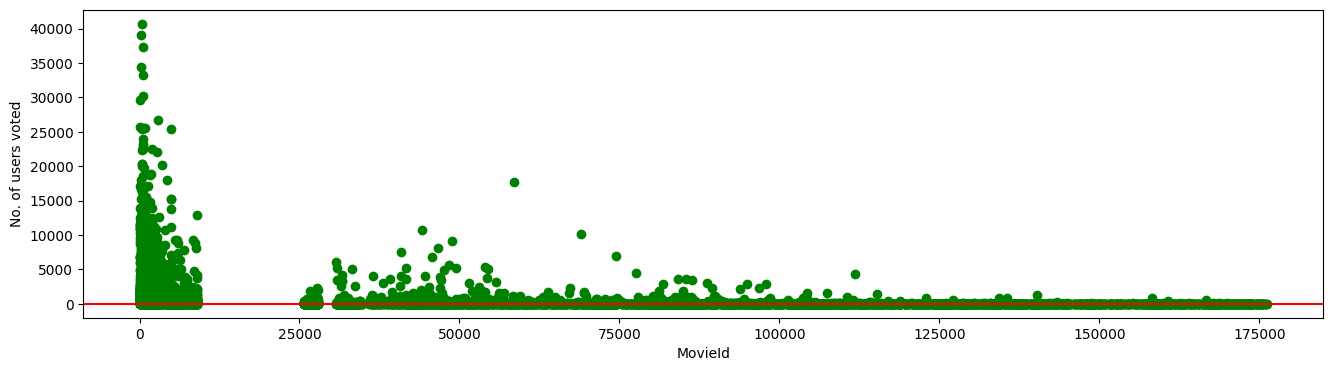

In [ ]:
plt.figure(figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color="green")
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

Text(0, 0.5, 'No. of movie voted')

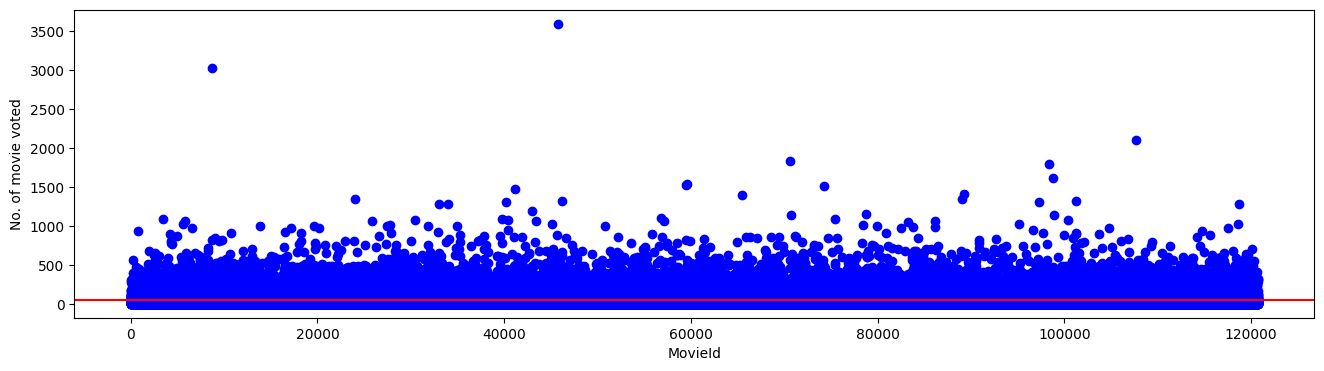

In [ ]:
plt.figure(figsize=(16,4))
plt.scatter(no_movie_voted.index,no_movie_voted,color="blue")
plt.axhline(y=50,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of movie voted')

In [ ]:
final_dataset=final_dataset.loc[no_user_voted[no_user_voted>10].index,:]

In [ ]:
final_dataset=final_dataset.loc[:,no_movie_voted[no_movie_voted>50].index]

In [ ]:
final_dataset.head()

userId,8.0,11.0,12.0,15.0,16.0,20.0,24.0,34.0,37.0,41.0,...,120716.0,120719.0,120732.0,120733.0,120739.0,120741.0,120744.0,120748.0,120756.0,120759.0
movieId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,4.0,0.0,4.0,0.0,0.0,5.0,4.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,3.5,4.0,0.0,4.5,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
csr_data=csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
final_dataset.head()

userId,movieId,8.0,11.0,12.0,15.0,16.0,20.0,24.0,34.0,37.0,...,120716.0,120719.0,120732.0,120733.0,120739.0,120741.0,120744.0,120748.0,120756.0,120759.0
0,2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,0.0,4.0,0.0,4.0,0.0,0.0,5.0,4.0,0.0,3.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,6,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,...,0.0,0.0,3.5,4.0,0.0,4.5,0.0,0.0,0.0,0.0
4,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(csr_data)

  (0, 6)	3.0
  (0, 7)	3.0
  (0, 10)	4.0
  (0, 13)	4.5
  (0, 16)	2.0
  (0, 20)	4.0
  (0, 23)	4.0
  (0, 26)	2.5
  (0, 40)	3.0
  (0, 43)	4.0
  (0, 44)	3.0
  (0, 46)	2.0
  (0, 53)	3.0
  (0, 54)	4.0
  (0, 58)	4.0
  (0, 64)	2.0
  (0, 66)	2.5
  (0, 68)	2.5
  (0, 69)	3.0
  (0, 70)	4.0
  (0, 71)	3.0
  (0, 73)	3.0
  (0, 74)	2.0
  (0, 76)	3.0
  (0, 77)	3.0
  :	:
  (4468, 23885)	3.5
  (4468, 25753)	2.0
  (4468, 26166)	3.5
  (4469, 604)	4.0
  (4469, 10043)	3.0
  (4469, 11386)	3.5
  (4469, 13328)	3.0
  (4469, 14018)	2.5
  (4469, 14360)	0.5
  (4469, 15359)	4.0
  (4469, 21194)	3.5
  (4469, 21784)	2.5
  (4469, 23501)	4.0
  (4469, 25788)	4.0
  (4470, 3324)	4.0
  (4470, 12034)	1.0
  (4470, 12820)	3.0
  (4470, 12825)	2.0
  (4470, 14644)	2.0
  (4470, 16736)	1.5
  (4470, 16830)	1.0
  (4470, 20372)	1.5
  (4470, 21365)	3.0
  (4470, 23114)	1.5
  (4470, 23403)	2.0


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn=NearestNeighbors(metric="cosine",algorithm="auto",n_neighbors=20,n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation("Toy Story")

,Title,Distance
1,Downhill Racer,0.779032
2,The Bank Job,0.778211
3,Longitude,0.768465
4,Tom Jones,0.764100
5,The Pillow Book,0.757270
6,A Kiss Before Dying,0.753390
7,Khadak,0.749555
8,Mondo Topless,0.745931
9,Deep Impact,0.738696
10,Basket Case 3,0.673481


In [ ]:
import pickle

In [ ]:
pickle.dump(get_movie_recommendation,open("get_movie_recommendation.pkl","wb"))

In [ ]:
from flask import Flask, request, jsonify
app = Flask(__name__)
@app.route('/recommend', methods=['GET'])
def recommend():
    movie_name = request.args.get('movie')
    recommendations = get_movie_recommendation(movie_name)

    if isinstance(recommendations, str):
        return jsonify({'error': recommendations})
    else:
        return jsonify(recommendations)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
